# Data Acquisition
<p>In Excel, combined relevant/similar columns from 2007, 2009, 2011, 2013, 2015-2019 LAHSA Homeless Counts, available from <a href="https://www.lahsa.org/documents">LAHSA</a> and <a href="https://economicrt.org/publication/los-angeles-county-homeless-count-data-library/">Economic Roundtable</a>. Also extracted LA evictions data for 2000-2016 from the <a href="https://evictionlab.org/">Princeton Eviction Lab.</a></p>
<p>Read in homeless count and evictions data as pandas dataframes called homelessness and evictions.</p>

In [82]:
import os
import pandas as pd
import numpy as np

#import LA homelessness data & LA evictions data
homelessness = pd.read_excel('/Users/sgd/Dropbox/Documents/DataIncubator/CapstoneProject/HomelessCountData/homelessnessdata2007-2019.xlsx', header=0)
evictions = pd.read_excel('/Users/sgd/Dropbox/Documents/DataIncubator/CapstoneProject/EvictionsData/LACEvictionsByTract.xlsx', header=0)

In [83]:
#check dataframes
homelessness.head()
#print(evictions.head())
#print(homelessness.head())

print([col for col in homelessness])
print([col for col in evictions])
#evictions.loc[[0],['GEOID']]
evictions['GEOID'].head()

['Year', 'tractNum', 'totalUnshelteredPeopleCount', 'adultsCount', 'youthCount', 'totalFamiliesCount', 'carsCount', 'vansCount', 'campersCount', 'tentsCount', 'otherShelterCount']
['GEOID', 'year', 'name', 'parent-location', 'population', 'poverty-rate', 'renter-occupied-households', 'pct-renter-occupied', 'median-gross-rent', 'median-household-income', 'median-property-value', 'rent-burden', 'pct-white', 'pct-af-am', 'pct-hispanic', 'pct-am-ind', 'pct-asian', 'pct-nh-pi', 'pct-multiple', 'pct-other', 'eviction-filings', 'evictions', 'eviction-rate', 'eviction-filing-rate', 'low-flag', 'imputed', 'subbed']


0    6037101110
1    6037101110
2    6037101110
3    6037101110
4    6037101110
Name: GEOID, dtype: int64

# Data Reorganization and Combination
<p>Create a new sorting column for evictions data because census tracts are in long form with state and county. To match Homelessness data, they should be in short form with only the rightmost 6 digits.</p>
<p>Then, combine dataframes on both a year and tract match.</p>

In [84]:
# make a new column called NEW_TRACT that contains only the last 6 digits of the original GEOID column
evictions['NEW_TRACT'] = evictions['GEOID']%1000000

#merge homelessness and evictions dataframes on year and tract number (outer merge)
evictionsandhomelessness = pd.merge(homelessness, evictions,  how='outer', left_on=['Year','tractNum'], right_on = ['year','NEW_TRACT'])

print(evictions.shape) #(39888, 28)
print(homelessness.shape) #(15231, 11)
print(evictionsandhomelessness.shape)
evictionsandhomelessness.loc[6000] # this is tract 240200, may be a good one to plot


(39888, 28)
(15231, 11)
(47544, 39)


Year                             2017
tractNum                       271200
totalUnshelteredPeopleCount     27.38
adultsCount                         4
youthCount                          0
totalFamiliesCount                  0
carsCount                           0
vansCount                           2
campersCount                        3
tentsCount                          0
otherShelterCount                   7
GEOID                             NaN
year                              NaN
name                              NaN
parent-location                   NaN
population                        NaN
poverty-rate                      NaN
renter-occupied-households        NaN
pct-renter-occupied               NaN
median-gross-rent                 NaN
median-household-income           NaN
median-property-value             NaN
rent-burden                       NaN
pct-white                         NaN
pct-af-am                         NaN
pct-hispanic                      NaN
pct-am-ind  

Text(0.5, 1.0, 'Example plot of Homelessness and Evictions, 2007 - 2016 in Tract #240200')

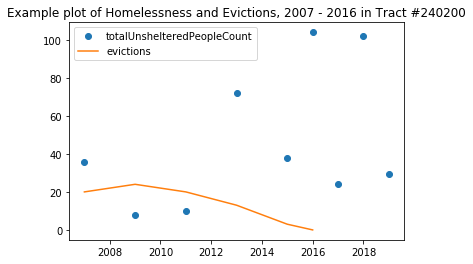

In [85]:
import matplotlib.pyplot as plt
tract240200 = evictionsandhomelessness.loc[evictionsandhomelessness['tractNum'] == 240200]
tract240200.head()
plt.plot(tract240200['Year'], tract240200['totalUnshelteredPeopleCount'],'o')
plt.plot(tract240200['Year'], tract240200['evictions'],'-')
plt.legend()
plt.title('Example plot of Homelessness and Evictions, 2007 - 2016 in Tract #240200')

# Group census tracts on similarities
<p>So far, no idea about what will be the best measure of similarity, so naively trying sevral options like mean poverty rate, percentage of renters in district, and rent burden</p>

In [92]:
evictionsandhomelessness['povrategroup'] = pd.cut(evictionsandhomelessness['poverty-rate'],bins=[0,25,50,75,100], labels=[1,2,3,4])
EH_narm = evictionsandhomelessness.dropna(subset=['povrategroup','evictions','totalUnshelteredPeopleCount'])
print(EH_narm.shape)
EH_narm.columns
EH_narm['povrategroup'].describe()
EH_narm.count()
print(EH_narm.iloc[4618])

#EH_narm['totalUnshelteredPeopleCount'] = pd.to_numeric(EH_narm['totalUnshelteredPeopleCount'])

(7332, 40)
Year                                                     2015
tractNum                                               500500
totalUnshelteredPeopleCount                                 0
adultsCount                                                 0
youthCount                                                  0
totalFamiliesCount                                          0
carsCount                                                   0
vansCount                                                   1
campersCount                                                5
tentsCount                                                  0
otherShelterCount                                           0
GEOID                                              6.0375e+09
year                                                     2015
name                                                     5005
parent-location                Los Angeles County, California
population                                               28

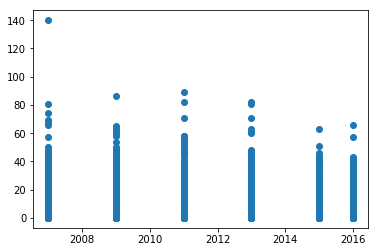

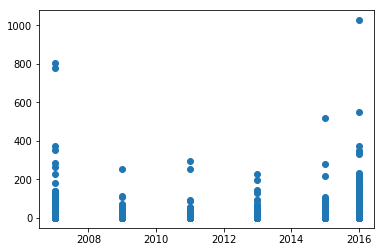

In [99]:
plt.plot(EH_narm['Year'], EH_narm['evictions'],'o')
plt.show()
plt.plot(EH_narm['Year'], EH_narm['totalUnshelteredPeopleCount'],'o')
plt.show()